In [1]:
from pathlib import Path
from fastai.vision.all import *
from retinaface import RetinaFace

In [27]:
from matplotlib import pyplot as plt

In [21]:
import sys

In [22]:
sys.path.append("../recognition/")

In [23]:
from crop import CustomCrop

In [2]:
project_dir = Path("../")
train_images = project_dir / "images/girls/"
trained_model = Path("exported.pkl")

In [16]:
learner = load_learner(trained_model)

In [17]:
test_img = "../images/test/IMG_20191102_170301.jpg"

In [18]:
detected_faces_desc = RetinaFace.detect_faces(str(test_img))

In [19]:
detected_faces_desc

{'face_1': {'score': 0.9995328187942505,
  'facial_area': [921, 718, 1322, 1224],
  'landmarks': {'right_eye': [1084.1367, 902.46545],
   'left_eye': [1258.0315, 923.32446],
   'nose': [1192.6954, 1009.0002],
   'mouth_right': [1081.4352, 1085.3748],
   'mouth_left': [1232.1718, 1102.2657]}},
 'face_2': {'score': 0.999062716960907,
  'facial_area': [1933, 760, 2232, 1192],
  'landmarks': {'right_eye': [2038.38, 923.8178],
   'left_eye': [2180.6777, 938.2566],
   'nose': [2118.9148, 1019.1121],
   'mouth_right': [2023.5122, 1065.4652],
   'mouth_left': [2160.6746, 1078.7738]}},
 'face_3': {'score': 0.9988642930984497,
  'facial_area': [2280, 1503, 2482, 1744],
  'landmarks': {'right_eye': [2309.7874, 1612.5006],
   'left_eye': [2391.4104, 1597.4791],
   'nose': [2343.434, 1659.8652],
   'mouth_right': [2342.8887, 1703.7233],
   'mouth_left': [2398.9238, 1690.9642]}},
 'face_4': {'score': 0.9978220462799072,
  'facial_area': [2628, 1413, 2824, 1648],
  'landmarks': {'right_eye': [2659.25

In [20]:
face1_roi = detected_faces_desc['face_1']['facial_area']

In [25]:
cropped_face_img = CustomCrop(width=300, height=300, face_percent=80).crop(str(test_img), *face1_roi)

In [26]:
learner.predict(cropped_face_img)

('shira', TensorBase(1), TensorBase([0.2456, 0.7544]))

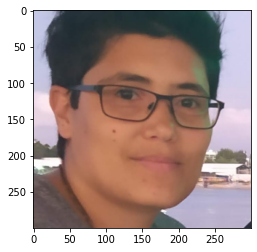

In [28]:
plt.imshow(cropped_face_img)